In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana, warnings, curvedsky.utils as csu, tqdm
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [2]:
dirs  = local.data_directory()
aobj0 = local.init_analysis_params(qid='boss_s15d',fltr='cinv',wind='base',ivar='base')
qobj0 = quad_func.reconstruction(dirs['local'],aobj0.ids,stag=aobj0.stag,rlmin=500,qlist=['TT'])

In [3]:
nmap = 0.
for rlz in tqdm.tqdm(range(1,101)):
    glm  = quad_func.load_rec_alm(qobj0,'TT',rlz)[0]
    gmap = csu.hp_alm2map(1024,qobj0.olmax,qobj0.olmax,glm)
    nmap += gmap**2

100%|██████████| 100/100 [04:06<00:00,  2.47s/it]


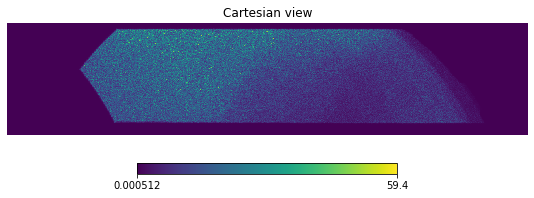

In [4]:
hp.cartview(nmap,lonra=[-220,-100],latra=[-5,21])

In [5]:
Mmap = hp.ud_grade ( tools_cmb.load_window_curvedsky( aobj0, with_ivar=False, add_mask=False ), 1024 )

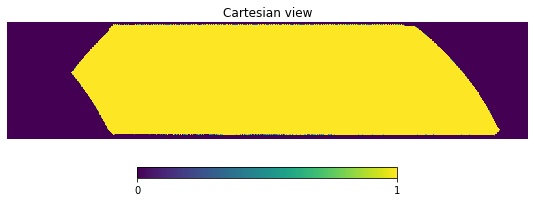

In [6]:
hp.cartview(Mmap,lonra=[-220,-100],latra=[-5,22])

In [7]:
print(np.mean(Mmap))

0.05186180273691813


In [8]:
aobj1 = local.init_analysis_params(fltr='none',wind='com16',ivar='noivar',ptsr='none')
M16 = hp.ud_grade( tools_cmb.load_window_curvedsky( aobj1 ), 1024 )

In [9]:
M16[M16!=0] = 1.

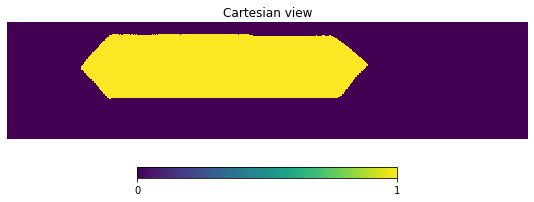

In [10]:
hp.cartview(M16,lonra=[-220,-100],latra=[-5,22])

0.3 0.571044224622353
0.019433382303729055
0.010358315987939664
0.5330166322077663


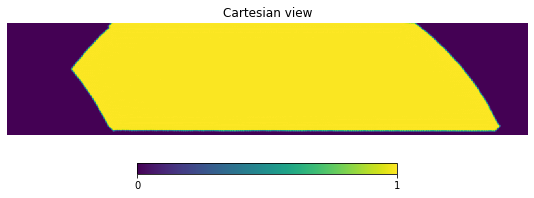

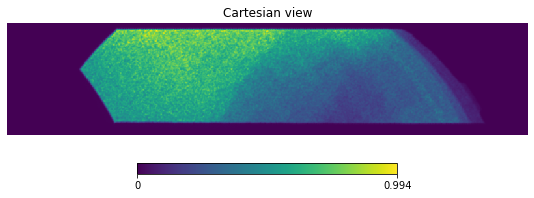

0.5 0.6384639006501448
0.021730274227799214
0.012848903248520905
0.5912904325930455


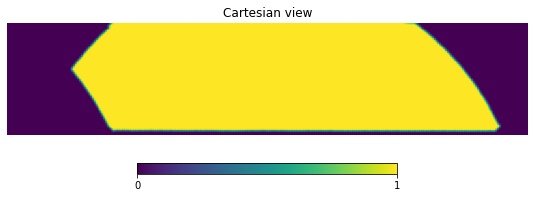

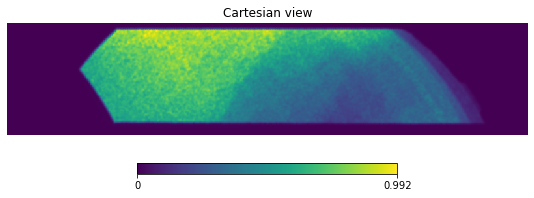

0.7 0.6702556766026788
0.02282289447283284
0.01408117529061763
0.6169758751406011


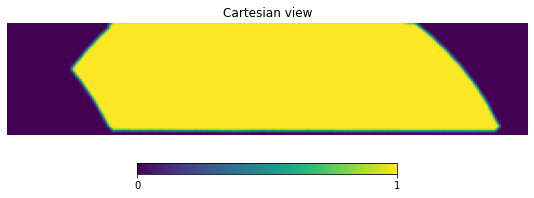

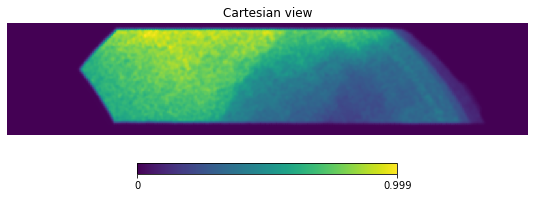

1.0 0.6889724183689458
0.02349493287152866
0.014783789955032921
0.6292331217063416


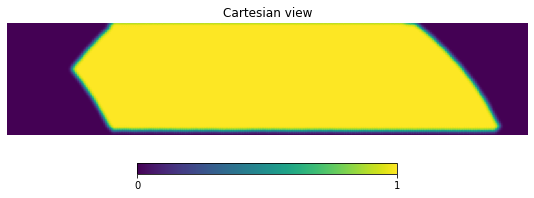

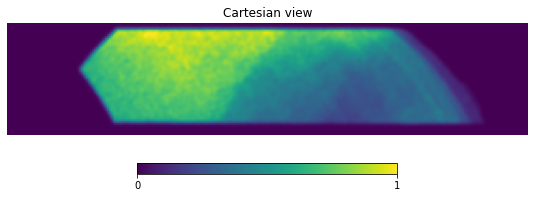

1.5 0.7055392951825246
0.02417942913307136
0.015397921248078143
0.6368190565350309


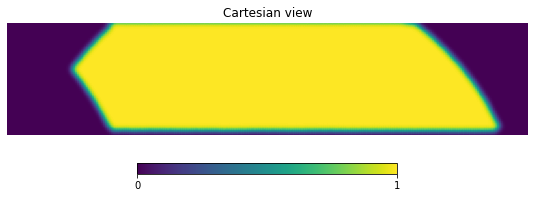

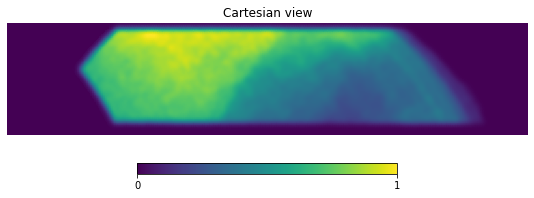

2.0 0.7214159296133184
0.024924031993791413
0.016052764134903173
0.644067706978627


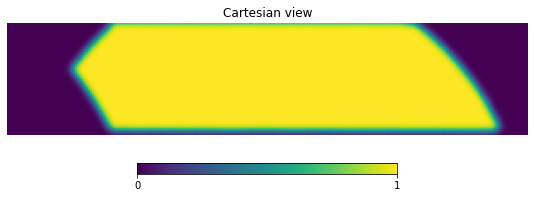

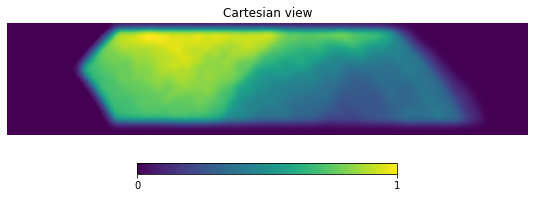

In [14]:
for theta in [.3,.5,.7,1.,1.5,2.]:
#for theta in [1.]:
    Smap = hp.sphtfunc.smoothing(Mmap*nmap, fwhm=theta*np.pi/180., lmax=1024 )
    Smap[Smap<0] = 0.
    mmap = hp.sphtfunc.smoothing(Mmap, fwhm=theta*np.pi/180., lmax=1024 )
    mmap[mmap<0] = 0.
    Smap = Mmap * Smap/mmap
    Smap[mmap==0] = 0.
    Smap = Smap/np.max(Smap)
    fid  = np.mean(M16*Smap) / np.mean(M16)
    print(theta,fid)
    #Smap = Smap/fid
    print(np.mean(Smap))
    print(np.mean(Smap**2))
    print(np.mean(Smap**2)/np.mean(Smap))
    #Smap[Smap==0.] = np.inf
    #Rmap = 1./Smap
    #print(np.mean(Rmap))
    #print(np.mean(Rmap**2))
    #print(np.mean(Rmap**2)/np.mean(Rmap))
    hp.cartview(mmap,lonra=[-220,-100],latra=[-5,21])
    hp.cartview(Smap,lonra=[-220,-100],latra=[-5,21])
    show()